In [1]:
import os
import json
import numpy as np
import scipy.stats as ss
import pylab as plt
from glob import glob
from copy import deepcopy

def filter_by_condi(a, mods, prs, lls, dds, mod=None, pr=None, ll=None, dd=None):
    """
    Filter a matrix of trial data to only get the data from trials that match the specified condition(s)
    :param a: A numpy array with the data from one trial on each row
    :param condi: A list of tuples indicating the list length, presentation rate, modality, distractor duration of each trial
    :param ll: Return only trials with this list length condition (ignore if None)
    :param pr: Return only trials with this presentation rate condition (ignore if None)
    :param mod: Return only trials with this presentation modality condition (ignore if None)
    :param dd: Return only trials with this distractor duration condition (ignore if None
    :return: A numpy array containing only the data from trials that match the specified condition(s)
    """
    if pr == 's':
        pr = 1600
    elif pr == 'f':
        pr = 800
        
    ll = int(ll) if ll is not None else None
    dd = int(dd) if dd is not None else None
    
    ind = [i for i in range(len(a)) if ((ll is None or lls[i] == ll) and (pr is None or prs[i] == pr) and (mod is None or mods[i] == mod) and (dd is None or dds[i] == dd))]
    if len(ind) == 0:
        return np.array([])
    return np.array(a)[ind]

In [2]:
EXCL_WN = True
COLOR = False

excl_str = '_excl_wn' if EXCL_WN else ''
if COLOR:
    VIS_COLOR = '#011F5B' #'C0-'
    AUD_COLOR = '#990000' #'C3-'
    VA_COLOR = '#990000'
    AV_COLOR = '#011F5B'
    VIS_FMT = '-'
    AUD_FMT = '-'
    VA_FMT = '--'
    AV_FMT = '--'
    ERR_ALPHA = .3
    ERR_ALPHA2 = .15
    ERR_ALPHA3 = .1
else:
    VIS_COLOR = 'k'
    AUD_COLOR = 'k'
    VA_COLOR = 'k'
    AV_COLOR = 'k'
    VIS_FMT = '-'
    AUD_FMT = '--'
    VA_FMT = '-.'
    AV_FMT = ':'
    ERR_ALPHA = .2
    ERR_ALPHA2 = .15
    ERR_ALPHA3 = .1

SMALL_SIZE = 12
MEDIUM_SIZE = 14
LARGE_SIZE = 18

plt.rc('font', size=LARGE_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=LARGE_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=LARGE_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)  # fontsize of the figure title

In [3]:
###
# Load statistics and list of participants who wrote notes
###

WN = [s.decode('UTF-8') for s in np.loadtxt('../Data/WROTE_NOTES.txt', dtype='S8')]

with open('../Data/stats/all_v1%s.json' % excl_str, 'r') as f:
    s = json.load(f)

means1 = s['mean']
sems1 = s['sem']
Ns1 = s['N']

with open('../Data/stats/all_v2%s.json' % excl_str, 'r') as f:
    s = json.load(f)

means2 = s['mean']
sems2 = s['sem']
Ns2 = s['N']

# SPC

In [4]:
def spc(m1, s1, m2, s2):

    ###
    # Experiment 1
    ###
    
    m = m1['spc']
    s = s1['spc']

    # SPCs for slow presentation
    ax = plt.subplot(221)
    ax.plot(range(1, 13), m['sv12'], VIS_FMT+'o', color=VIS_COLOR)
    ax.fill_between(range(1, 13), np.add(m['sv12'], s['sv12']), np.subtract(m['sv12'], s['sv12']), color=VIS_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 13), m['sa12'], AUD_FMT+'o', color=AUD_COLOR, mfc='w')
    ax.fill_between(range(1, 13), np.add(m['sa12'], s['sa12']), np.subtract(m['sa12'], s['sa12']), color=AUD_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 25), m['sv24'], VIS_FMT+'^', color=VIS_COLOR)
    ax.fill_between(range(1, 25), np.add(m['sv24'], s['sv24']), np.subtract(m['sv24'], s['sv24']), color=VIS_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 25), m['sa24'], AUD_FMT+'^', color=AUD_COLOR, mfc='w')
    ax.fill_between(range(1, 25), np.add(m['sa24'], s['sa24']), np.subtract(m['sa24'], s['sa24']), color=AUD_COLOR, alpha=ERR_ALPHA)
    ax.legend(labels=['Visual-12', 'Auditory-12', 'Visual-24', 'Auditory-24'], loc=2)
    plt.ylabel('Recall Probability (Exp. 1)')
    plt.title('Slow Presentation')
    plt.ylim(0, 1)
    plt.xlim(.5, 24.5)
    plt.xticks([1, 4, 8, 12, 16, 20, 24])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    # SPCs for fast presentation
    ax = plt.subplot(222)
    ax.plot(range(1, 13), m['fv12'], VIS_FMT+'o', color=VIS_COLOR)
    ax.fill_between(range(1, 13), np.add(m['fv12'], s['fv12']), np.subtract(m['fv12'], s['fv12']), color=VIS_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 13), m['fa12'], AUD_FMT+'o', color=AUD_COLOR, mfc='w')
    ax.fill_between(range(1, 13), np.add(m['fa12'], s['fa12']), np.subtract(m['fa12'], s['fa12']), color=AUD_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 25), m['fv24'], VIS_FMT+'^', color=VIS_COLOR)
    ax.fill_between(range(1, 25), np.add(m['fv24'], s['fv24']), np.subtract(m['fv24'], s['fv24']), color=VIS_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 25), m['fa24'], AUD_FMT+'^', color=AUD_COLOR, mfc='w')
    ax.fill_between(range(1, 25), np.add(m['fa24'], s['fa24']), np.subtract(m['fa24'], s['fa24']), color=AUD_COLOR, alpha=ERR_ALPHA)
    plt.title('Fast Presentation')
    plt.ylim(0, 1)
    ax.set_yticklabels([])
    plt.xlim(.5, 24.5)
    plt.xticks([1, 4, 8, 12, 16, 20, 24])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    ###
    # Experiment 2
    ###
    
    m = m2['spc']
    s = s2['spc']

    # SPCs for slow presentation
    ax = plt.subplot(223)
    ax.plot(range(1, 13), m['sv12'], VIS_FMT+'o', color=VIS_COLOR)
    ax.fill_between(range(1, 13), np.add(m['sv12'], s['sv12']), np.subtract(m['sv12'], s['sv12']), color=VIS_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 13), m['sa12'], AUD_FMT+'o', color=AUD_COLOR, mfc='w')
    ax.fill_between(range(1, 13), np.add(m['sa12'], s['sa12']), np.subtract(m['sa12'], s['sa12']), color=AUD_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 25), m['sv24'], VIS_FMT+'^', color=VIS_COLOR)
    ax.fill_between(range(1, 25), np.add(m['sv24'], s['sv24']), np.subtract(m['sv24'], s['sv24']), color=VIS_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 25), m['sa24'], AUD_FMT+'^', color=AUD_COLOR, mfc='w')
    ax.fill_between(range(1, 25), np.add(m['sa24'], s['sa24']), np.subtract(m['sa24'], s['sa24']), color=AUD_COLOR, alpha=ERR_ALPHA)
    plt.ylabel('Recall Probability (Exp. 2)')
    plt.ylim(0, 1)
    plt.xlim(.5, 24.5)
    plt.xticks([1, 4, 8, 12, 16, 20, 24])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    # SPCs for fast presentation
    ax = plt.subplot(224)
    ax.plot(range(1, 13), m['fv12'], VIS_FMT+'o', color=VIS_COLOR)
    ax.fill_between(range(1, 13), np.add(m['fv12'], s['fv12']), np.subtract(m['fv12'], s['fv12']), color=VIS_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 13), m['fa12'], AUD_FMT+'o', color=AUD_COLOR, mfc='w')
    ax.fill_between(range(1, 13), np.add(m['fa12'], s['fa12']), np.subtract(m['fa12'], s['fa12']), color=AUD_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 25), m['fv24'], VIS_FMT+'^', color=VIS_COLOR)
    ax.fill_between(range(1, 25), np.add(m['fv24'], s['fv24']), np.subtract(m['fv24'], s['fv24']), color=VIS_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 25), m['fa24'], AUD_FMT+'^', color=AUD_COLOR, mfc='w')
    ax.fill_between(range(1, 25), np.add(m['fa24'], s['fa24']), np.subtract(m['fa24'], s['fa24']), color=AUD_COLOR, alpha=ERR_ALPHA)
    plt.ylim(0, 1)
    ax.set_yticklabels([])
    plt.xlim(.5, 24.5)
    plt.xticks([1, 4, 8, 12, 16, 20, 24])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    plt.gcf().text(0.54, 0.012, 'Serial Position', ha='center', va='center')
    
    plt.gcf().set_size_inches(12, 10)
    plt.tight_layout(w_pad=.5)

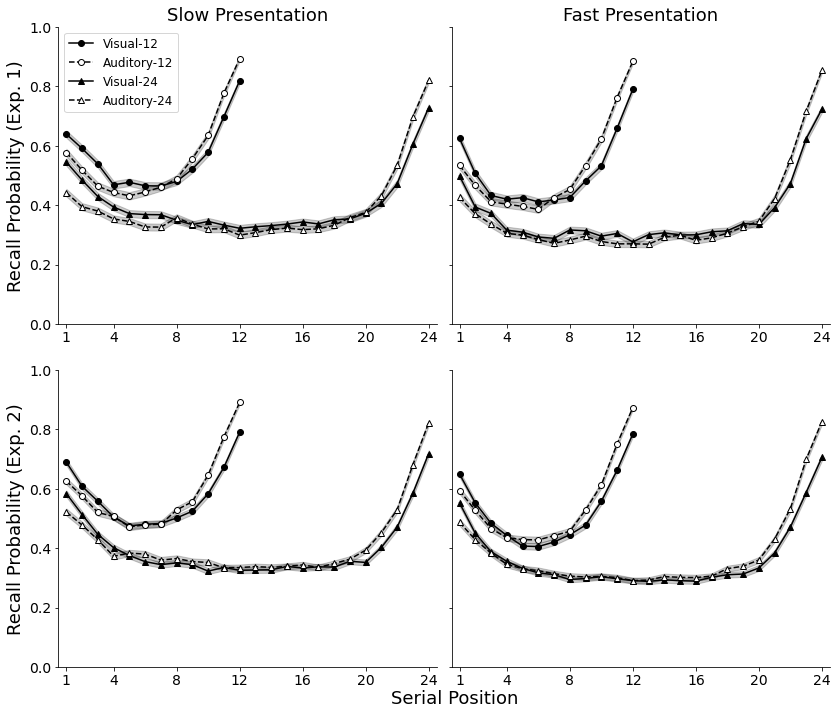

In [5]:
spc(means1, sems1, means2, sems2)
plt.savefig('figures/spc.pdf')

# PFR

In [6]:
def pfr(m1, s1, m2, s2):

    ###
    # Experiment 1
    ###
    
    m = m1['pfr']
    s = s1['pfr']

    # PFR for slow presentation
    ax = plt.subplot(221)
    ax.plot(range(1, 13), m['sv12'], VIS_FMT+'o', color=VIS_COLOR)
    ax.fill_between(range(1, 13), np.add(m['sv12'], s['sv12']), np.subtract(m['sv12'], s['sv12']), color=VIS_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 13), m['sa12'], AUD_FMT+'o', color=AUD_COLOR, mfc='w')
    ax.fill_between(range(1, 13), np.add(m['sa12'], s['sa12']), np.subtract(m['sa12'], s['sa12']), color=AUD_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 25), m['sv24'], VIS_FMT+'^', color=VIS_COLOR)
    ax.fill_between(range(1, 25), np.add(m['sv24'], s['sv24']), np.subtract(m['sv24'], s['sv24']), color=VIS_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 25), m['sa24'], AUD_FMT+'^', color=AUD_COLOR, mfc='w')
    ax.fill_between(range(1, 25), np.add(m['sa24'], s['sa24']), np.subtract(m['sa24'], s['sa24']), color=AUD_COLOR, alpha=ERR_ALPHA)
    ax.legend(labels=['Visual-12', 'Auditory-12', 'Visual-24', 'Auditory-24'], loc=2)
    plt.ylabel('Prob. of First Recall (Exp. 1)')
    plt.title('Slow Presentation')
    plt.ylim(0, .5)
    plt.xlim(.5, 24.5)
    plt.xticks([1, 4, 8, 12, 16, 20, 24])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    # PFR for fast presentation
    ax = plt.subplot(222)
    ax.plot(range(1, 13), m['fv12'], VIS_FMT+'o', color=VIS_COLOR)
    ax.fill_between(range(1, 13), np.add(m['fv12'], s['fv12']), np.subtract(m['fv12'], s['fv12']), color=VIS_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 13), m['fa12'], AUD_FMT+'o', color=AUD_COLOR, mfc='w')
    ax.fill_between(range(1, 13), np.add(m['fa12'], s['fa12']), np.subtract(m['fa12'], s['fa12']), color=AUD_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 25), m['fv24'], VIS_FMT+'^', color=VIS_COLOR)
    ax.fill_between(range(1, 25), np.add(m['fv24'], s['fv24']), np.subtract(m['fv24'], s['fv24']), color=VIS_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 25), m['fa24'], AUD_FMT+'^', color=AUD_COLOR, mfc='w')
    ax.fill_between(range(1, 25), np.add(m['fa24'], s['fa24']), np.subtract(m['fa24'], s['fa24']), color=AUD_COLOR, alpha=ERR_ALPHA)
    plt.title('Fast Presentation')
    plt.ylim(0, .5)
    ax.set_yticklabels([])
    plt.xlim(.5, 24.5)
    plt.xticks([1, 4, 8, 12, 16, 20, 24])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    ###
    # Experiment 2
    ###
    
    m = m2['pfr']
    s = s2['pfr']

    # PFR for slow presentation
    ax = plt.subplot(223)
    ax.plot(range(1, 13), m['sv12'], VIS_FMT+'o', color=VIS_COLOR)
    ax.fill_between(range(1, 13), np.add(m['sv12'], s['sv12']), np.subtract(m['sv12'], s['sv12']), color=VIS_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 13), m['sa12'], AUD_FMT+'o', color=AUD_COLOR, mfc='w')
    ax.fill_between(range(1, 13), np.add(m['sa12'], s['sa12']), np.subtract(m['sa12'], s['sa12']), color=AUD_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 25), m['sv24'], VIS_FMT+'^', color=VIS_COLOR)
    ax.fill_between(range(1, 25), np.add(m['sv24'], s['sv24']), np.subtract(m['sv24'], s['sv24']), color=VIS_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 25), m['sa24'], AUD_FMT+'^', color=AUD_COLOR, mfc='w')
    ax.fill_between(range(1, 25), np.add(m['sa24'], s['sa24']), np.subtract(m['sa24'], s['sa24']), color=AUD_COLOR, alpha=ERR_ALPHA)
    plt.ylabel('Prob. of First Recall (Exp. 2)')
    plt.ylim(0, .5)
    plt.xlim(.5, 24.5)
    plt.xticks([1, 4, 8, 12, 16, 20, 24])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    # PFR for fast presentation
    ax = plt.subplot(224)
    ax.plot(range(1, 13), m['fv12'], VIS_FMT+'o', color=VIS_COLOR)
    ax.fill_between(range(1, 13), np.add(m['fv12'], s['fv12']), np.subtract(m['fv12'], s['fv12']), color=VIS_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 13), m['fa12'], AUD_FMT+'o', color=AUD_COLOR, mfc='w')
    ax.fill_between(range(1, 13), np.add(m['fa12'], s['fa12']), np.subtract(m['fa12'], s['fa12']), color=AUD_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 25), m['fv24'], VIS_FMT+'^', color=VIS_COLOR)
    ax.fill_between(range(1, 25), np.add(m['fv24'], s['fv24']), np.subtract(m['fv24'], s['fv24']), color=VIS_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 25), m['fa24'], AUD_FMT+'^', color=AUD_COLOR, mfc='w')
    ax.fill_between(range(1, 25), np.add(m['fa24'], s['fa24']), np.subtract(m['fa24'], s['fa24']), color=AUD_COLOR, alpha=ERR_ALPHA)
    plt.ylim(0, .5)
    ax.set_yticklabels([])
    plt.xlim(.5, 24.5)
    plt.xticks([1, 4, 8, 12, 16, 20, 24])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    
    plt.gcf().text(0.54, 0.012, 'Serial Position', ha='center', va='center')
    
    plt.gcf().set_size_inches(13, 9)
    plt.tight_layout(w_pad=.5)

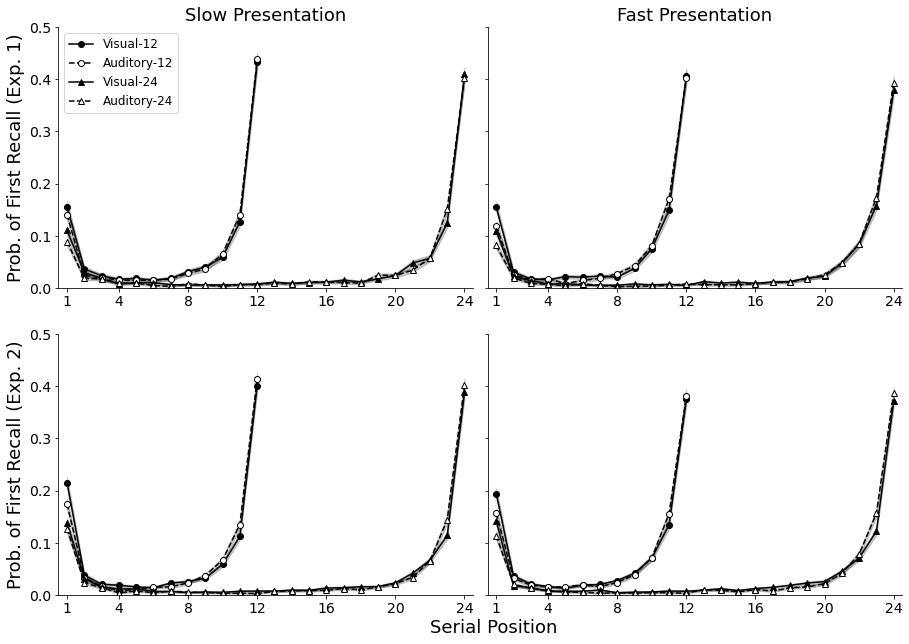

In [7]:
pfr(means1, sems1, means2, sems2)
plt.savefig('figures/pfr.pdf')

# SPC by Start Position

In [8]:
def spc_by_start(m1, s1, m2, s2):

    # SPC when initiating from first item
    m = m1['spc_fr1']
    s = s1['spc_fr1']
    ax = plt.subplot(221)
    ax.plot(range(1, 13), m['v12'], VIS_FMT+'o', color=VIS_COLOR)
    ax.fill_between(range(1, 13), np.add(m['v12'], s['v12']), np.subtract(m['v12'], s['v12']), color=VIS_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 13), m['a12'], AUD_FMT+'o', color=AUD_COLOR, mfc='w')
    ax.fill_between(range(1, 13), np.add(m['a12'], s['a12']), np.subtract(m['a12'], s['a12']), color=AUD_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 25), m['v24'], VIS_FMT+'^', color=VIS_COLOR)
    ax.fill_between(range(1, 25), np.add(m['v24'], s['v24']), np.subtract(m['v24'], s['v24']), color=VIS_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 25), m['a24'], AUD_FMT+'^', color=AUD_COLOR, mfc='w')
    ax.fill_between(range(1, 25), np.add(m['a24'], s['a24']), np.subtract(m['a24'], s['a24']), color=AUD_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 13), m['v12'], VIS_FMT+'o', color=VIS_COLOR)
    ax.plot(range(1, 25), m['v24'], VIS_FMT+'^', color=VIS_COLOR)
    ax.legend(labels=['Visual-12', 'Auditory-12', 'Visual-24', 'Auditory-24'])
    plt.title('Beginning Start')
    plt.ylabel('Recall Probability (Exp. 1)')
    plt.ylim(-.01, 1.01)
    plt.xlim(.5, 24.5)
    plt.xticks([1, 4, 8, 12, 16, 20, 24])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    # SPC when initiating from last four items
    m = m1['spc_frl4']
    s = s1['spc_frl4']
    ax = plt.subplot(222)
    ax.plot(range(1, 13), m['v12'], VIS_FMT+'o', color=VIS_COLOR)
    ax.fill_between(range(1, 13), np.add(m['v12'], s['v12']), np.subtract(m['v12'], s['v12']), color=VIS_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 13), m['a12'], AUD_FMT+'o', color=AUD_COLOR, mfc='w')
    ax.fill_between(range(1, 13), np.add(m['a12'], s['a12']), np.subtract(m['a12'], s['a12']), color=AUD_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 25), m['v24'], VIS_FMT+'^', color=VIS_COLOR)
    ax.fill_between(range(1, 25), np.add(m['v24'], s['v24']), np.subtract(m['v24'], s['v24']), color=VIS_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 25), m['a24'], AUD_FMT+'^', color=AUD_COLOR, mfc='w')
    ax.fill_between(range(1, 25), np.add(m['a24'], s['a24']), np.subtract(m['a24'], s['a24']), color=AUD_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 13), m['v12'], VIS_FMT+'o', color=VIS_COLOR)
    ax.plot(range(1, 25), m['v24'], VIS_FMT+'^', color=VIS_COLOR)
    plt.title('Last Four Start')
    plt.ylim(-.01, 1.01)
    plt.xlim(.5, 24.5)
    plt.xticks([1, 4, 8, 12, 16, 20, 24])
    ax.set_yticklabels([])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    # SPC when initiating from first item
    m = m2['spc_fr1']
    s = s2['spc_fr1']
    ax = plt.subplot(223)
    ax.plot(range(1, 13), m['v12'], VIS_FMT+'o', color=VIS_COLOR)
    ax.fill_between(range(1, 13), np.add(m['v12'], s['v12']), np.subtract(m['v12'], s['v12']), color=VIS_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 13), m['a12'], AUD_FMT+'o', color=AUD_COLOR, mfc='w')
    ax.fill_between(range(1, 13), np.add(m['a12'], s['a12']), np.subtract(m['a12'], s['a12']), color=AUD_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 25), m['v24'], VIS_FMT+'^', color=VIS_COLOR)
    ax.fill_between(range(1, 25), np.add(m['v24'], s['v24']), np.subtract(m['v24'], s['v24']), color=VIS_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 25), m['a24'], AUD_FMT+'^', color=AUD_COLOR, mfc='w')
    ax.fill_between(range(1, 25), np.add(m['a24'], s['a24']), np.subtract(m['a24'], s['a24']), color=AUD_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 13), m['v12'], VIS_FMT+'o', color=VIS_COLOR)
    ax.plot(range(1, 25), m['v24'], VIS_FMT+'^', color=VIS_COLOR)
    plt.ylabel('Recall Probability (Exp. 2)')
    plt.ylim(-.01, 1.01)
    plt.xlim(.5, 24.5)
    plt.xticks([1, 4, 8, 12, 16, 20, 24])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    # SPC when initiating from last four items
    m = m2['spc_frl4']
    s = s2['spc_frl4']
    ax = plt.subplot(224)
    ax.plot(range(1, 13), m['v12'], VIS_FMT+'o', color=VIS_COLOR)
    ax.fill_between(range(1, 13), np.add(m['v12'], s['v12']), np.subtract(m['v12'], s['v12']), color=VIS_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 13), m['a12'], AUD_FMT+'o', color=AUD_COLOR, mfc='w')
    ax.fill_between(range(1, 13), np.add(m['a12'], s['a12']), np.subtract(m['a12'], s['a12']), color=AUD_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 25), m['v24'], VIS_FMT+'^', color=VIS_COLOR)
    ax.fill_between(range(1, 25), np.add(m['v24'], s['v24']), np.subtract(m['v24'], s['v24']), color=VIS_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 25), m['a24'], AUD_FMT+'^', color=AUD_COLOR, mfc='w')
    ax.fill_between(range(1, 25), np.add(m['a24'], s['a24']), np.subtract(m['a24'], s['a24']), color=AUD_COLOR, alpha=ERR_ALPHA)
    ax.plot(range(1, 13), m['v12'], VIS_FMT+'o', color=VIS_COLOR)
    ax.plot(range(1, 25), m['v24'], VIS_FMT+'^', color=VIS_COLOR)
    plt.ylim(-.01, 1.01)
    plt.xlim(.5, 24.5)
    plt.xticks([1, 4, 8, 12, 16, 20, 24])
    ax.set_yticklabels([])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    plt.gcf().text(0.54, 0.012, 'Serial Position', ha='center', va='center')
    
    plt.gcf().set_size_inches(12, 10)
    plt.tight_layout(w_pad=.5)

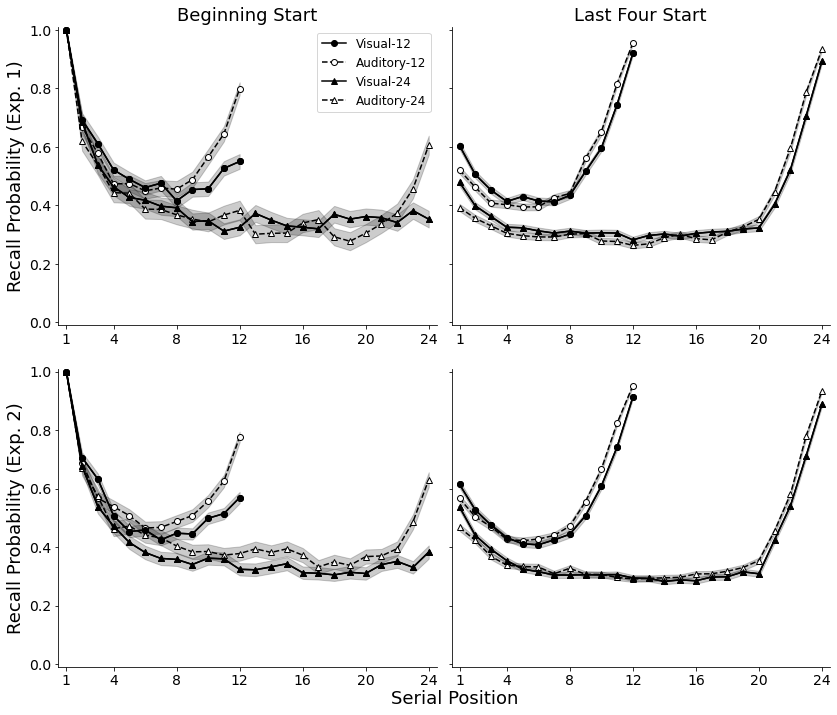

In [9]:
spc_by_start(means1, sems1, means2, sems2)
plt.savefig('figures/spc_by_start.pdf')

# Prior-List Intrusions

In [10]:
def intrusions(m1, s1, m2, s2, n_points=5):
    
    f, ((sp1, sp2), (sp3, sp4)) = plt.subplots(2, 2, gridspec_kw={'width_ratios':[1, 1.4]})

    m = m1['plis_2factor']
    s = s1['plis_2factor']
    
    sp1.bar([1, 2, 3, 4], [m[0][0], m[1][1], m[0][1], m[1][0]], yerr=[s[0][0]*1.96, s[1][1]*1.96, s[0][1]*1.96, s[1][0]*1.96], color=['w', 'w', 'w', 'w'], edgecolor='k', capsize=3)
    sp1.set_xticks([1, 2, 3, 4])
    sp1.set_xticklabels(('V-V', 'A-A', 'V-A', 'A-V'))
    sp1.set_ylim(0, .125)
    sp1.set_xlabel('Modality')
    sp1.set_ylabel('PLIs per Trial (Exp. 1)')
    sp1.spines['right'].set_visible(False)
    sp1.spines['top'].set_visible(False)
    sp1.yaxis.set_ticks_position('left')
    sp1.xaxis.set_ticks_position('bottom')
    
    m = m2['plis']
    s = s2['plis']
    
    sp3.bar([1, 2], [m['v'], m['a']], yerr=[s['v']*1.96, s['a']*1.96], color=['w', 'w'], edgecolor='k', capsize=3)
    sp3.set_xticks([1, 2])
    sp3.set_xticklabels(('Visual', 'Auditory'))
    sp3.set_ylim(0, .25)
    sp3.set_xlabel('Modality')
    sp3.set_ylabel('PLIs per Trial (Exp. 2)')
    sp3.spines['right'].set_visible(False)
    sp3.spines['top'].set_visible(False)
    sp3.yaxis.set_ticks_position('left')
    sp3.xaxis.set_ticks_position('bottom')
    
    xrange = range(1, 6)
    m = np.array(m1['pli_recency_2factor'])
    s = np.array(s1['pli_recency_2factor'])
    
    sp2.plot(xrange, m[:n_points, 0, 0], VIS_FMT, color=VIS_COLOR)
    sp2.fill_between(xrange, np.add(m[:n_points, 0, 0], s[:n_points, 0, 0]), np.subtract(m[:n_points, 0, 0], s[:n_points, 0, 0]), color=VIS_COLOR, alpha=ERR_ALPHA)
    sp2.plot(xrange, m[:n_points, 0, 1], VA_FMT, color=VA_COLOR)
    sp2.fill_between(xrange, np.add(m[:n_points, 0, 1], s[:n_points, 0, 1]), np.subtract(m[:n_points, 0, 1], s[:n_points, 0, 1]), color=VA_COLOR, alpha=ERR_ALPHA)
    sp2.plot(xrange, m[:n_points, 1, 0], AV_FMT, color=AV_COLOR)
    sp2.fill_between(xrange, np.add(m[:n_points, 1, 0], s[:n_points, 1, 0]), np.subtract(m[:n_points, 1, 0], s[:n_points, 1, 0]), color=AV_COLOR, alpha=ERR_ALPHA)
    sp2.plot(xrange, m[:n_points, 1, 1], AUD_FMT, color=AUD_COLOR)
    sp2.fill_between(xrange, np.add(m[:n_points, 1, 1], s[:n_points, 1, 1]), np.subtract(m[:n_points, 1, 1], s[:n_points, 1, 1]), color=AUD_COLOR, alpha=ERR_ALPHA)
    sp2.legend(labels=['V-V', 'V-A', 'A-V', 'A-A'])
    sp2.set_xlabel('List Recency')
    sp2.set_ylabel('Proportion of PLIs (Exp. 1)')
    sp2.set_xticks(xrange)
    sp2.set_ylim(0, .5)
    sp2.spines['right'].set_visible(False)
    sp2.spines['top'].set_visible(False)
    sp2.yaxis.set_ticks_position('left')
    sp2.xaxis.set_ticks_position('bottom')
    
    m = m2['pli_recency']
    s = s2['pli_recency']
    
    sp4.plot(xrange, m['v'][:n_points], VIS_FMT, color=VIS_COLOR)
    sp4.fill_between(xrange, np.add(m['v'][:n_points], s['v'][:n_points]), np.subtract(m['v'][:n_points], s['v'][:n_points]), color=VIS_COLOR, alpha=ERR_ALPHA)
    sp4.plot(xrange, m['a'][:n_points], AUD_FMT, color=AUD_COLOR)
    sp4.fill_between(xrange, np.add(m['a'][:n_points], s['a'][:n_points]), np.subtract(m['a'][:n_points], s['a'][:n_points]), color=AUD_COLOR, alpha=ERR_ALPHA)
    sp4.legend(labels=['Visual', 'Auditory'])
    sp4.set_xlabel('List Recency')
    sp4.set_ylabel('Proportion of PLIs (Exp. 2)')
    sp4.set_xticks(xrange)
    sp4.set_ylim(0, .5)
    sp4.spines['right'].set_visible(False)
    sp4.spines['top'].set_visible(False)
    sp4.yaxis.set_ticks_position('left')
    sp4.xaxis.set_ticks_position('bottom')
    
    plt.gcf().set_size_inches(12, 10)
    plt.tight_layout(w_pad=.5)

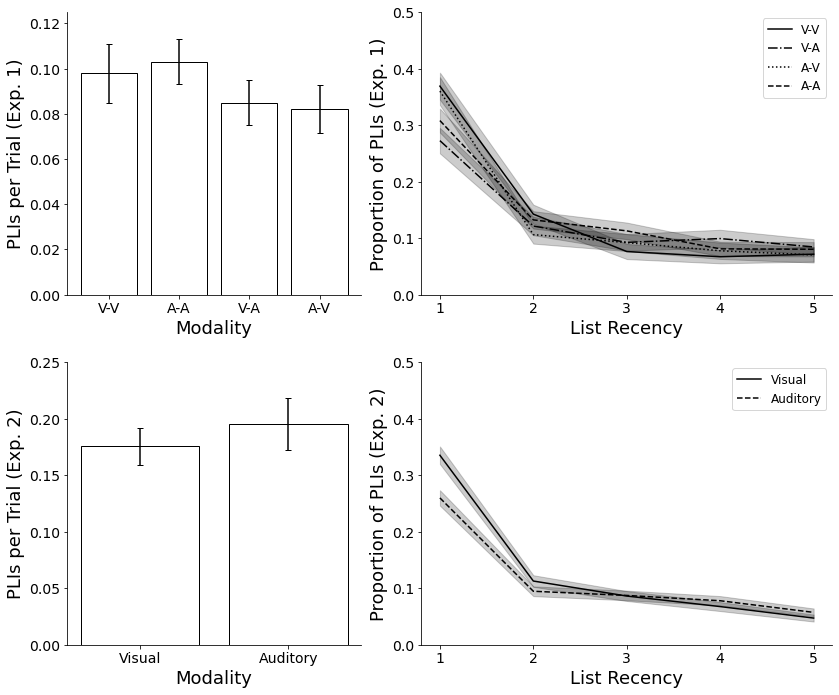

In [11]:
intrusions(means1, sems1, means2, sems2)
plt.savefig('figures/intrusions.pdf')